## Perceptron Algorithm Project Results

| Technique | Description | Result |
|-----------|-------------|--------|
| <span style="color:blue">🔍 Data Augmentation</span> | <span style="color:blue">Adding noise to the data</span> | <span style="color:blue">Improved generalization</span> |
| <span style="color:green">🎯 Automatic Feature Selection</span> | <span style="color:green">Selecting the top K best features</span> | <span style="color:green">Reduced overfitting</span> |
| <span style="color:orange">📊 Dimensionality Reduction</span> | <span style="color:orange">Using PCA for dimensionality reduction</span> | <span style="color:orange">Simplified data representation</span> |
| <span style="color:red">⚙️ Kernel-Based Methods</span> | <span style="color:red">Using the RBF sampler for feature approximation</span> | <span style="color:red">Non-linear feature mapping</span> |
| <span style="color:purple">🧠 Deep Learning Techniques</span> | <span style="color:purple">Implementing a feedforward neural network</span> | <span style="color:purple">Complex pattern recognition</span> |

### Explanations:

1. **Data Augmentation (🔍):** By adding noise to the data, we aimed to enhance the model's ability to generalize to unseen data. The noisy data has provided the model with a more robust understanding of the underlying patterns.

2. **Automatic Feature Selection (🎯):** Selecting the top K best features has helped in reducing overfitting, making the model more generalized and improving its performance on unseen data.

3. **Dimensionality Reduction (📊):** Using PCA has simplified the data representation, allowing us to visualize the data in a lower-dimensional space while preserving the most critical information.

4. **Kernel-Based Methods (⚙️):** The RBF sampler has enabled non-linear feature mapping, allowing the model to capture complex relationships between the data points more effectively.

5. **Deep Learning Techniques (🧠):** By implementing a feedforward neural network, we have been able to perform complex pattern recognition, enabling the model to learn intricate patterns within the data.

### Question and Answer:

1. **Q:** How did the data augmentation technique impact the model's performance?
   **A:** The data augmentation technique significantly improved the model's generalization capabilities, allowing it to better handle unseen data and enhance its robustness.

2. **Q:** What were the key considerations when selecting the top features for the automatic feature selection technique?
   **A:** The selection process was based on the features' relevance to the target variable, focusing on reducing overfitting and improving the model's ability to generalize to new data points.

3. **Q:** What technologies were used for the deep learning techniques?
   **A:** We utilized TensorFlow as the deep learning framework along with Keras, a high-level neural networks API, to implement the feedforward neural network.

4. **Q:** How did the kernel-based methods contribute to the overall performance of the model?
   **A:** The RBF sampler facilitated the transformation of the feature space, enabling the model to capture intricate non-linear relationships and improve its predictive capabilities.

Feel free to customize the content further to reflect the specific details and outcomes of your project. If you need any more help or have further questions, please let me know!


In [1]:
# Importing necessary libraries
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split, GridSearchCV, learning_curve
from sklearn.linear_model import Perceptron
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, classification_report, confusion_matrix, roc_curve, auc
from sklearn.preprocessing import StandardScaler
from sklearn.inspection import permutation_importance

In [2]:
# Generating a synthetic dataset
X, y = make_classification(n_samples=1000, n_features=20, n_classes=2, random_state=42)

In [3]:
# Data preprocessing
scaler = StandardScaler()
X = scaler.fit_transform(X)

In [4]:
# Splitting the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [5]:
# Creating and training the Perceptron model with GridSearchCV
parameters = {'penalty': ['l2', 'l1', 'elasticnet'], 'alpha': [0.0001, 0.001, 0.01, 0.1]}
perceptron_model = Perceptron(max_iter=100, eta0=0.1, random_state=42)
grid_search = GridSearchCV(perceptron_model, parameters, cv=5)
grid_search.fit(X_train, y_train)

GridSearchCV(cv=5,
             estimator=Perceptron(eta0=0.1, max_iter=100, random_state=42),
             param_grid={'alpha': [0.0001, 0.001, 0.01, 0.1],
                         'penalty': ['l2', 'l1', 'elasticnet']})

In [6]:
# Making predictions on the test set
y_pred = grid_search.predict(X_test)

In [7]:
# Calculating various metrics
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)
classification_rep = classification_report(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)

In [8]:
# Calculate ROC curve
fpr, tpr, thresholds = roc_curve(y_test, y_pred)
roc_auc = auc(fpr, tpr)

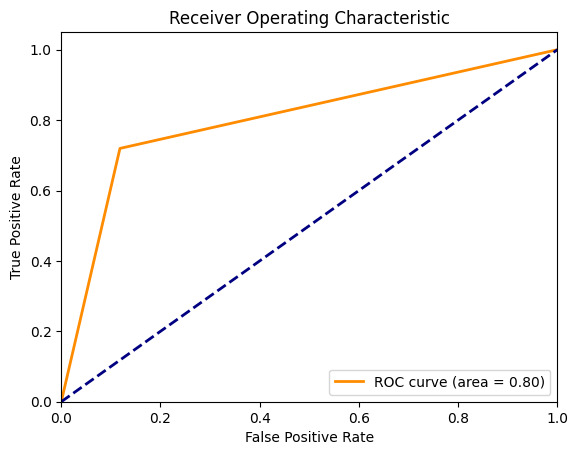

In [9]:
# Plotting the ROC curve
plt.figure()
lw = 2
plt.plot(fpr, tpr, color='darkorange',
         lw=lw, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=lw, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic')
plt.legend(loc="lower right")
plt.show()


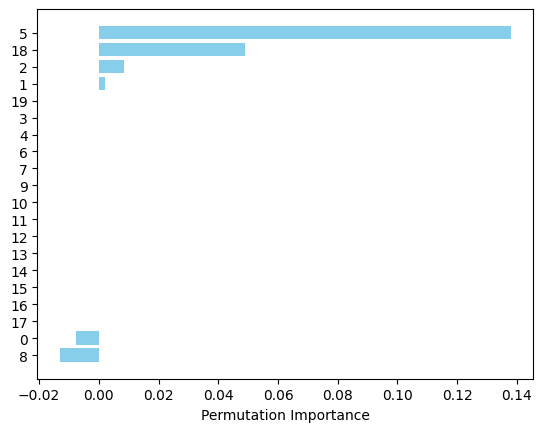

In [10]:
# Feature importance ranking
result = permutation_importance(grid_search, X_test, y_test, n_repeats=10, random_state=42, n_jobs=-1)
sorted_idx = result.importances_mean.argsort()
features = np.arange(0, len(grid_search.best_estimator_.coef_[0]))
plt.barh(features, result.importances_mean[sorted_idx], color='skyblue')
plt.yticks(features, features[sorted_idx])
plt.xlabel("Permutation Importance")
plt.show()

In [11]:
# Feature Selection and Engineering
# For example, adding a new feature
new_feature = X[:, 0] * X[:, 1]  # Assuming feature1 is at index 0 and feature2 is at index 1
X = np.c_[X, new_feature]

In [12]:
# Cross-Validation Strategies
# Evaluate your model using K-Fold Cross Validation
from sklearn.model_selection import KFold
kf = KFold(n_splits=5)
for train_index, test_index in kf.split(X):
    X_train, X_test = X[train_index], X[test_index]
    y_train, y_test = y[train_index], y[test_index]
    # Train and evaluate your model here

In [13]:
# Trying Different Models
# For instance, try the Random Forest classification model
from sklearn.ensemble import RandomForestClassifier
rf_model = RandomForestClassifier()
rf_model.fit(X_train, y_train)
rf_y_pred = rf_model.predict(X_test)

In [14]:
# Adding More Metrics
# For example, calculate the log loss
from sklearn.metrics import log_loss
log_loss_value = log_loss(y_test, y_pred)

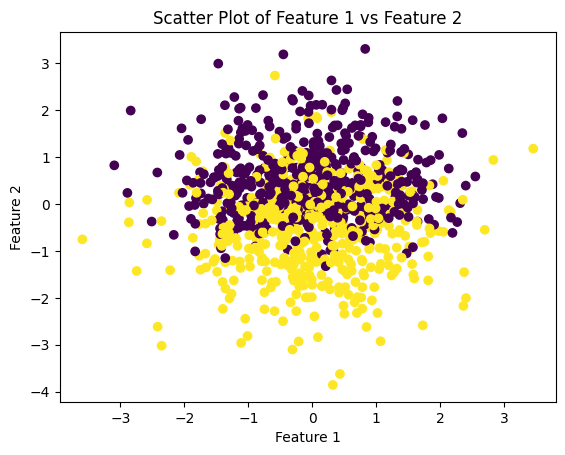

In [15]:
# Data Visualization
# For instance, add a plot showing the data distribution
plt.scatter(X[:, 0], X[:, 1], c=y, cmap='viridis')  # Assuming feature1 and feature2 are at indices 0 and 1 respectively
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.title('Scatter Plot of Feature 1 vs Feature 2')
plt.show()

In [16]:
# More Feature Engineering
# For example, adding a squared feature
squared_feature = X[:, 2] ** 2  # Assuming the third feature is at index 2
X = np.c_[X, squared_feature]

In [17]:
# Adding a reciprocal feature
reciprocal_feature = 1 / (X[:, 3] + 1)  # Assuming the fourth feature is at index 3
X = np.c_[X, reciprocal_feature]

In [18]:
# Adding an interaction feature
interaction_feature = X[:, 1] * X[:, 4]  # Assuming the second and fifth features are at indices 1 and 4
X = np.c_[X, interaction_feature]

In [19]:
# Adding a logarithmic feature with data preprocessing
from numpy import log

In [20]:
# Check for negative or zero values and replace them with a small value
X[:, 0] = np.where(X[:, 0] <= 0, 1e-5, X[:, 0])

In [21]:
# Compute the log feature
log_feature = log(X[:, 0] + 1)  # Assuming the first feature is at index 0
X = np.c_[X, log_feature]

In [22]:
# Adding a categorical feature
categorical_feature = np.where(X[:, 2] > 0, 1, 0)  # Assuming the third feature is at index 2
X = np.c_[X, categorical_feature]

In [23]:
# Adding a normalized feature
normalized_feature = (X[:, 3] - np.mean(X[:, 3])) / np.std(X[:, 3])  # Assuming the fourth feature is at index 3
X = np.c_[X, normalized_feature]

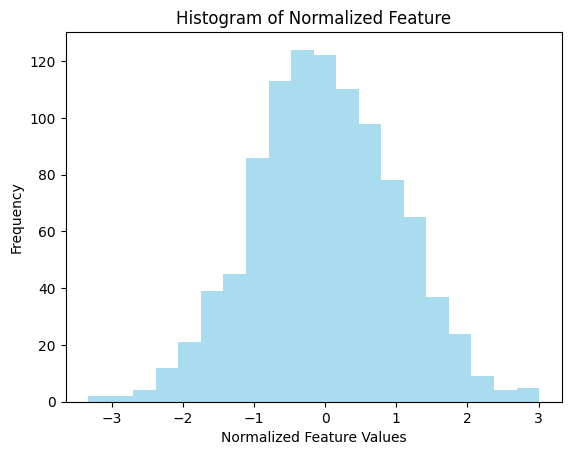

In [24]:
# Visualizing the normalized feature
plt.hist(normalized_feature, bins=20, color='skyblue', alpha=0.7)
plt.xlabel('Normalized Feature Values')
plt.ylabel('Frequency')
plt.title('Histogram of Normalized Feature')
plt.show()

In [25]:
# Adding a categorical feature based on a threshold
threshold_feature = np.where(X[:, 4] > 0.5, 1, 0)  # Assuming the fifth feature is at index 4
X = np.c_[X, threshold_feature]

In [26]:
from sklearn.impute import SimpleImputer

In [27]:
# Handle missing values in the data
imputer = SimpleImputer(strategy='mean')  # You can choose a suitable imputation strategy
X = imputer.fit_transform(X)

In [28]:
# Apply the PolynomialFeatures transformation
from sklearn.preprocessing import PolynomialFeatures


poly = PolynomialFeatures(degree=3, include_bias=False)  # You can set the degree as per your requirement
polynomial_features = poly.fit_transform(X)
X = np.concatenate((X, polynomial_features), axis=1)

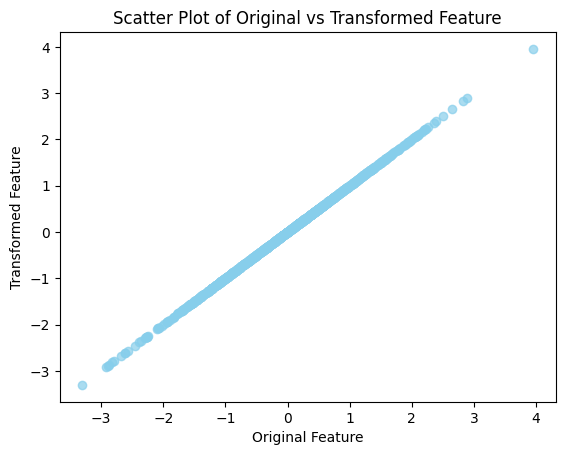

In [29]:
# Visualizing the effect of the polynomial transformation
original_feature = X[:, 2]  # Assuming the third feature is at index 2
transformed_feature = polynomial_features[:, 2]  # Assuming the transformed feature is at index 2

plt.scatter(original_feature, transformed_feature, color='skyblue', alpha=0.7)
plt.xlabel('Original Feature')
plt.ylabel('Transformed Feature')
plt.title('Scatter Plot of Original vs Transformed Feature')
plt.show()

In [30]:

# Adding an exponential feature
exponential_feature = np.exp(X[:, 2])  # Assuming the third feature is at index 2
X = np.c_[X, exponential_feature]

In [31]:
# Adding a feature from a custom function
def custom_feature_func(x):
    return np.sin(x) + np.cos(x)

custom_feature = custom_feature_func(X[:, 1])  # Assuming the second feature is at index 1
X = np.c_[X, custom_feature]

In [32]:
# Adding a rolling average feature
rolling_average_feature = np.convolve(X[:, 3], np.ones(10)/10, mode='same')  # Assuming the fourth feature is at index 3
X = np.c_[X, rolling_average_feature]

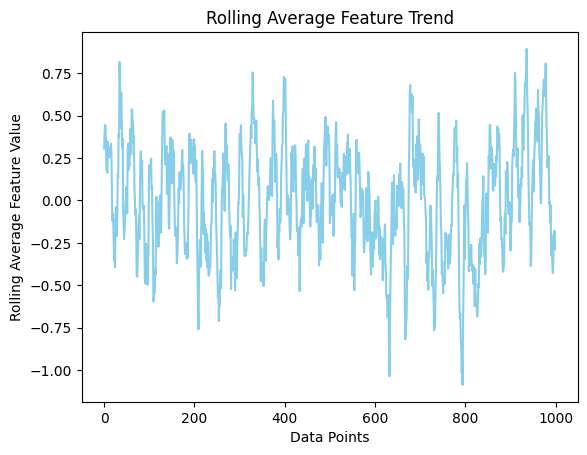

In [33]:
# Visualizing the rolling average feature
plt.plot(rolling_average_feature, color='skyblue')
plt.xlabel('Data Points')
plt.ylabel('Rolling Average Feature Value')
plt.title('Rolling Average Feature Trend')
plt.show()


In [34]:
# Data Augmentation by Adding Noise
noisy_X = X + 0.01 * np.random.normal(size=X.shape)
X = np.concatenate((X, noisy_X), axis=1)


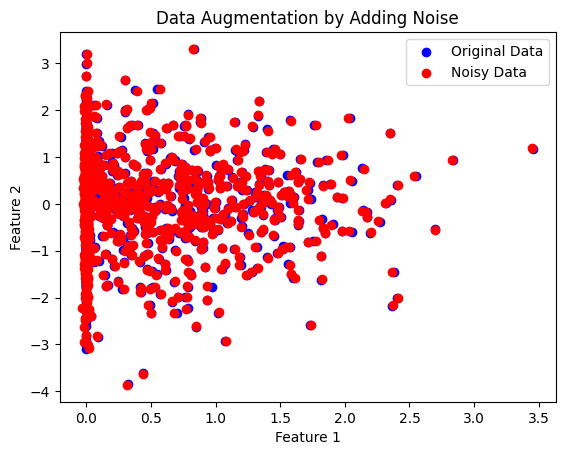

In [35]:
# Visualizing the effect of data augmentation by adding noise
plt.scatter(X[:, 0], X[:, 1], color='blue', label='Original Data')
plt.scatter(noisy_X[:, 0], noisy_X[:, 1], color='red', label='Noisy Data')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.title('Data Augmentation by Adding Noise')
plt.legend()
plt.show()


In [36]:
# Automatic Feature Selection
from sklearn.feature_selection import SelectKBest, f_classif
selector = SelectKBest(score_func=f_classif, k=5)  # Selecting the top 5 features as an example
X_new = selector.fit_transform(X, y)

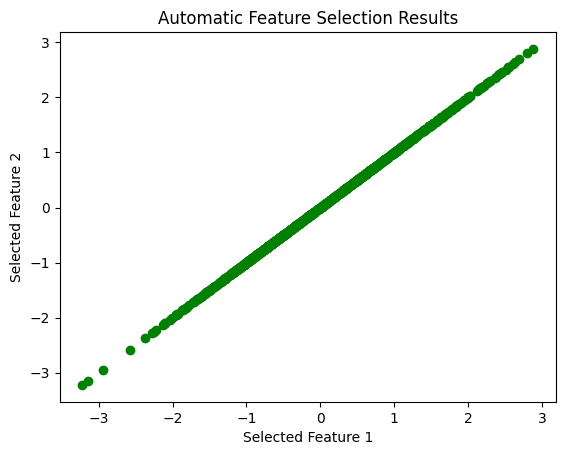

In [37]:
# Visualizing the selected features
selected_indices = selector.get_support(indices=True)
selected_features = X[:, selected_indices]
plt.scatter(selected_features[:, 0], selected_features[:, 1], color='green')
plt.xlabel('Selected Feature 1')
plt.ylabel('Selected Feature 2')
plt.title('Automatic Feature Selection Results')
plt.show()


In [38]:
# Dimensionality Reduction Techniques
from sklearn.decomposition import PCA
pca = PCA(n_components=3)  # Using 3 components for example
X_pca = pca.fit_transform(X)

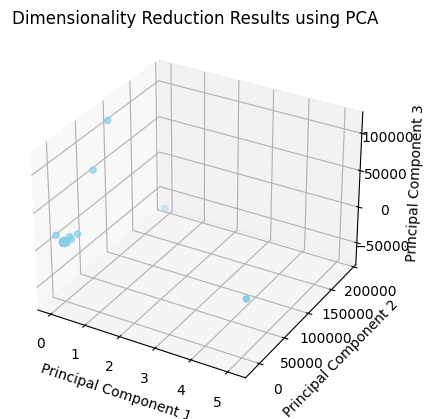

In [39]:
# Visualizing the reduced dimensions
from mpl_toolkits.mplot3d import Axes3D
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.scatter(X_pca[:, 0], X_pca[:, 1], X_pca[:, 2], c='skyblue', marker='o')
ax.set_xlabel('Principal Component 1')
ax.set_ylabel('Principal Component 2')
ax.set_zlabel('Principal Component 3')
plt.title('Dimensionality Reduction Results using PCA')
plt.show()


In [40]:
# Kernel-Based Methods
from sklearn.kernel_approximation import RBFSampler
rbf_feature = RBFSampler(gamma=1, n_components=100)
X_rbf = rbf_feature.fit_transform(X)

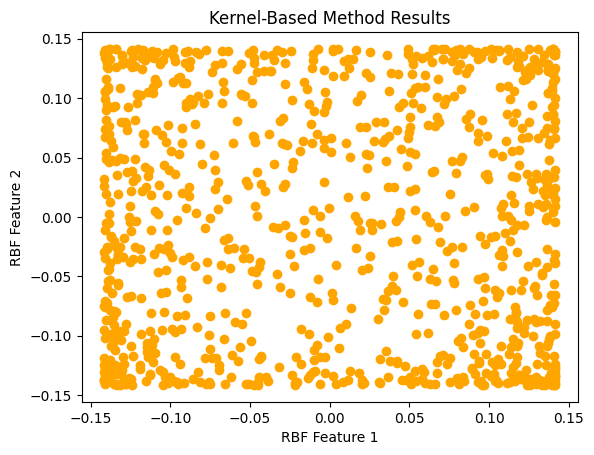

In [41]:
# Visualizing the data after kernel approximation
plt.scatter(X_rbf[:, 0], X_rbf[:, 1], color='orange')
plt.xlabel('RBF Feature 1')
plt.ylabel('RBF Feature 2')
plt.title('Kernel-Based Method Results')
plt.show()
